**Заголовок**: Исследование продаж компьютерных игр.

**Описание проекта:** Вы работаете аналитиком в интернет-магазине «Стримчик», который занимается продажей компьютерных игр по всему миру. В проекте нужно проанализировать исторические данные о продажах игр, жанрах, оценках пользователей и критиков, а также платформах, на которых они выпускались. Цель исследования — выявить закономерности, определяющие успешность игр, что поможет прогнозировать потенциально популярные продукты и планировать рекламные кампании на 2017 год. В данных также содержится информация о рейтингах игр от ESRB.

**Цель исследования:** Выявление ключевых факторов, влияющих на успешность продаж компьютерных игр, включая платформы, жанры и рейтинги. Это поможет определить, какие игры и платформы стоит продвигать в 2017 году, и оптимизировать маркетинговые стратегии интернет-магазина «Стримчик».

**Ход исследования:**
1. Подготовка данных:

- Открытие и изучение файла с данными о продажах игр.
- Приведение столбцов к нижнему регистру и корректировка типов данных.
- Обработка пропусков и специальных значений вроде 'tbd' в оценках пользователей.
- Подсчёт суммарных продаж во всех регионах в отдельном столбце.

2. Исследовательский анализ данных:

- Анализ количества игр, выпущенных в разные годы, для понимания актуальности данных за каждый период.
- Анализ динамики продаж по различным платформам.
- Определение актуального периода для прогнозов на 2017 год и выделение платформ с наибольшими продажами.
- Построение "ящика с усами" для анализа распределения глобальных продаж игр по платформам.
- Оценка влияния оценок пользователей и критиков на продажи внутри популярной платформы. Построение диаграмм рассеяния и вычисление корреляции.
- Определение распределения игр по жанрам и выявление наиболее прибыльных жанров.
- Оценка различий в продажах игр разных жанров.

3. Составление портрета пользователя по регионам:

- Определение топ-5 популярных платформ для каждого региона (Северная Америка, Европа, Япония).
- Анализ популярных жанров в каждом регионе и выявление различий.
- Оценка влияния рейтингов ESRB на продажи игр в отдельных регионах.

4. Проверка гипотез:

- Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports отличаются.

**Общий вывод:** резюмирование ключевых моментов, формулирование выводов и рекомендаций.

С помощью данного исследования мы стремимся выявить ключевые факторы, влияющие на успешность продаж компьютерных игр, включая платформы, жанры и рейтинги, чтобы спрогнозировать потенциально популярные продукты и оптимизировать рекламные кампании на 2017 год.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

##  Изучение общей информации

In [2]:
# отключаем предупреджения
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)

In [3]:
# cчитаем данные из csv-файла в датафрейм и сохраните в переменную data
# данные разделены запятой, укажем разделитель ","
data = pd.read_csv('/datasets/games.csv', sep=',')

In [4]:
# выведим первые 20 строчек датафрейма data на экран
pd.set_option('display.max_columns', None)
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
# выведим основную информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
# посчитаем сумму дубликатов в данных
data.duplicated().sum()

0

Таким образом, первичный осмотр данных показал, что необходимо провести работу с названиями столбцов, обработать пропуски и типы данных. Данные шаги будут выполнены в предобработке данных. 

## Предобработка данных

### Работа с названиями столбцов

In [8]:
# выведем перечень названий столбцов таблицы 
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Необходимо привести все столбцы к змеиному регистру и записать прописью

In [9]:
# переименонуем столбцы
data.columns = data.columns.str.lower()

In [10]:
# проверка результатов - перечень названий столбцов
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Таким образом, все названия столбцу приведены к "змеиному регистру".

### Работа с типами данных и аномалиями

In [11]:
# выведем описательную статистику по датафрейму
display(data.describe())
print()
print(data.info())

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [12]:
# изменим тип числа с плавающей точкой на целочисленное значение в столбце с годом, 
# так как исчисление ведётся в натуральных числах
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [13]:
# также поступим со столбцов critic_score, так как, согласно описательной статистике, оценки целочисленные
data['critic_score'] = data['critic_score'].astype('Int64')

In [14]:
# рассмотрим столбец user_score, где ожидаемые значения должны быть числовыми
data['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

In [15]:
data['user_score'].value_counts().sort_values(ascending=False)

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
1         2
0.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Значимое число оценок пользователей занимает аббревеатура tbd - «to be determined» («быть определённым»), то есть вероятно данные будут дополнены на месте данного значения. Для дальнейших вычислений и для того, заменим значение на пропуск.

In [16]:
# заменим значение и изменим тип данных на float
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype(float)
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Изучим на наличие аномалий столбцы name, platform, genre

In [17]:
# проверим на наличие полных дубликатов
data.duplicated().sum()

0

In [18]:
# изучим дубликаты в столбце name
df = data[data['name'].duplicated()]

In [19]:
data.query('name in @df.name').sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3862,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,<NA>,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013,Platform,0.27,0.27,0.00,0.05,<NA>,NaN,NaN
14658,007: Quantum of Solace,PC,2008,Action,0.01,0.01,0.00,0.00,70,6.3,T
9507,007: Quantum of Solace,DS,2008,Action,0.11,0.01,0.00,0.01,65,NaN,T
3120,007: Quantum of Solace,Wii,2008,Action,0.29,0.28,0.01,0.07,54,7.5,T
...,...,...,...,...,...,...,...,...,...,...,...
12648,pro evolution soccer 2011,PC,2010,Sports,0.00,0.05,0.00,0.01,79,NaN,NaN
15612,uDraw Studio: Instant Artist,X360,2011,Misc,0.01,0.01,0.00,0.00,54,5.7,E
8280,uDraw Studio: Instant Artist,Wii,2011,Misc,0.06,0.09,0.00,0.02,<NA>,NaN,E
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN


In [20]:
# найдёмм неявные дубликаты по повторам в названии и платформе
data.duplicated(subset=['name','platform']).sum()

5

In [21]:
# удалим дубликаты и проверим выполнение работы
data = data.drop_duplicates(subset=['name','platform']).reset_index(drop=True)
data.duplicated(subset=['name','platform']).sum()

0

In [22]:
# изучим уникальные значения в названии платформ
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [23]:
# изучим уникальные значения в жанрах
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [24]:
# изучим уникальные значения в рейтинге 
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Аномалий в столбцах не выявлено. Неявные дубликаты с повторами в названии и платформе удалены

Оценки критиков и пользователей находятся в ожидаемом диапазоне. Изучим показатели продаж на наличие выбросов.

In [25]:
# создадим функцию для подсчёта мягких выбросов
def emissions(df, column):
    '''Функция для подсчёта процента выбросов в столбце'''
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
 
    return f"процент выбросов составляет {round(len(data[(data[column] <= lower_bound) | (data[column] >= upper_bound)])/data.shape[0]*100, 2)}"

In [26]:
# создадим ф-ю для расчёта жёстких выбросов 
def heavy_emissions_num(df, column):
    '''Функция для подсчёта процента жестких выбросов в столбце'''
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
   
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
 
    return f"процент жёстких выбросов составляет {round(len(data[(data[column] <= lower_bound) | (data[column] >= upper_bound)])/data.shape[0]*100, 2)}"

In [27]:
# создадим функции для удаления выбросов
def remove_emissions(df, column):
    '''Функция для удаления выбросов через межквартильный размах'''
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
 
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].reset_index(drop=True)

In [28]:
def remove_heavy_emissions(df, column):
    '''Функция для удаления выбросов через межквартильный размах'''
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
   
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
 
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].reset_index(drop=True)

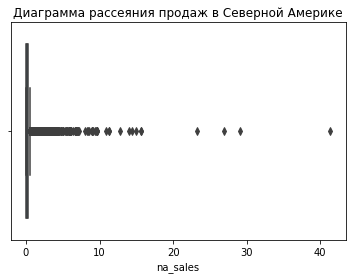

In [29]:
# построим диаграмму рассеяния для 'na_sales'
sns.boxplot(x=data['na_sales'])
plt.title('Диаграмма рассеяния продаж в Северной Америке');

In [30]:
emissions(data, 'na_sales')

'процент выбросов составляет 10.26'

In [31]:
heavy_emissions_num(data, 'na_sales')

'процент жёстких выбросов составляет 5.78'

Так как значение выбросов значимо, жёсткие выбросы составляют более 5%, то для корректного анализа не будем их удалять

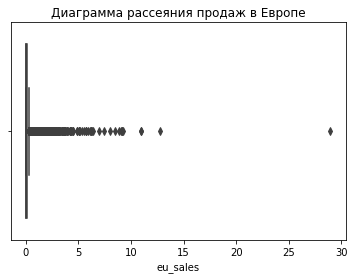

In [32]:
# построим диаграмму рассеяния для 'jp_sales'
sns.boxplot(x=data['eu_sales'])
plt.title('Диаграмма рассеяния продаж в Европе');

In [33]:
emissions(data, 'eu_sales')

'процент выбросов составляет 12.33'

In [34]:
heavy_emissions_num(data, 'eu_sales')

'процент жёстких выбросов составляет 7.82'

Так как значение выбросов выше 12% (7% - жёсткие выбросы), то оставим их, чтобы не было ошибок в подсчётах и выводах.

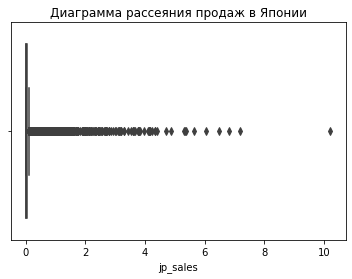

In [35]:
# построим диаграмму рассеяния для 'jp_sales'
sns.boxplot(x=data['jp_sales'])
plt.title('Диаграмма рассеяния продаж в Японии');

In [36]:
emissions(data, 'jp_sales')

'процент выбросов составляет 15.49'

In [37]:
heavy_emissions_num(data, 'eu_sales')

'процент жёстких выбросов составляет 7.82'

Значение выбросов велико, оставим их без изменений.

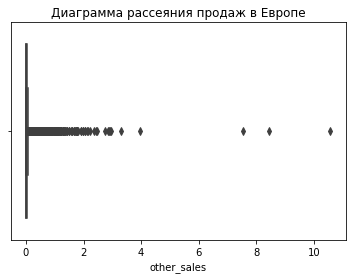

In [38]:
# построим диаграмму рассеяния для 'other_sales'
sns.boxplot(x=data['other_sales'])
plt.title('Диаграмма рассеяния продаж в Европе');

In [39]:
emissions(data, 'other_sales')

'процент выбросов составляет 13.42'

In [40]:
heavy_emissions_num(data, 'other_sales')

'процент жёстких выбросов составляет 9.07'

Значение выбросов велико, оставим их без изменений.

Таким образом, была проведена работа с типами данных и аномалиями. В столбцах year_of_release и critic_score значения были изменены на целочисленные. В столбце user_score выявлена аномалия - значение tbd, предположительные данные по этому столбцу будут дополняться, значение изменено на пропуск для простоты вычислений и замены. В столбцах na_sales, eu_sales, jp_sales и other_sales выявлена значимая доля выбросов - для корректного анализа выбросы оставлены. Дубликатов не выявлено.

### Работа с пропусками

In [41]:
# выведим количество пропущенных значений для каждого столбца, а также долю пропусков
print(data.isna().sum())
print()
data.isna().sum() / len(data) * 100

name                  1
platform              0
year_of_release     268
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
dtype: int64



name                0.005984
platform            0.000000
year_of_release     1.603830
genre               0.005984
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.328546
user_score         54.602035
rating             40.484740
dtype: float64

In [42]:
print(f'Суммарное количество пропусков: {data.isna().sum().sum()}')
print(f'Доля пропусков: {round(data.isna().sum().sum()/(data.shape[0]*data.shape[1]), 2)}')

Суммарное количество пропусков: 24736
Доля пропусков: 0.13


In [43]:
# выведем описательную статистику для столбцов с пропусками
data.loc[:, ['name', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']].describe()

,year_of_release,critic_score,user_score
count,16442.000000,8133.000000,7586.000000
mean,2006.484856,68.965818,7.125297
std,5.876498,13.936131,1.499717
min,1980.000000,13.000000,0.000000
25%,2003.000000,60.000000,6.400000
50%,2007.000000,71.000000,7.500000
75%,2010.000000,79.000000,8.200000
max,2016.000000,98.000000,9.700000


Пропуски в столбцах name и genre удалим. Так как количество пропущенных значений в данных столбцах совпадает, предположительно данные пропуски обусловлены неполнотой данных в открытых источниках, откуда производилась выгрузка или сбоем.

In [44]:
data.query('genre.isna() and name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,<NA>,NaN,NaN


In [45]:
data = data.dropna(subset=['name', 'genre'])

In [51]:
# изучим critic_score
data['critic_score'].describe()

count    8133.000000
mean       68.965818
std        13.936131
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

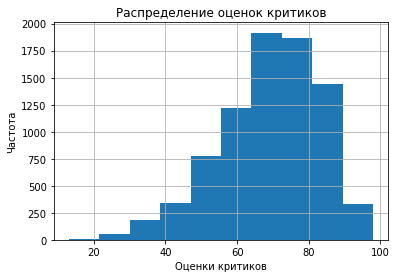

In [52]:
data['critic_score'].hist()
plt.title('Распределение оценок критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Частота')
plt.show()

<AxesSubplot:>

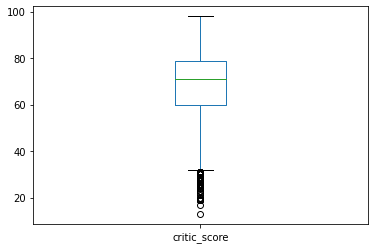

In [53]:
data['critic_score'].plot.box()

In [54]:
# изучим user_score
data['user_score'].describe()

count    7586.000000
mean        7.125297
std         1.499717
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

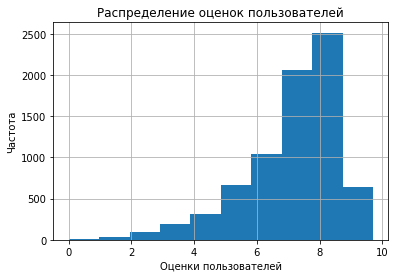

In [55]:
data['user_score'].hist()
plt.title('Распределение оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Частота')
plt.show()

In [56]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16441.000000,16709.000000,16709.000000,16709.000000,16709.000000,8133.000000,7586.000000
mean,2006.485676,0.263305,0.145039,0.077642,0.047347,68.965818,7.125297
std,5.875735,0.813635,0.503411,0.308906,0.186763,13.936131,1.499717
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Оставим пропуски в оценках, чтобы не исказить дальнейшие расчёты и выводы, так как рейтинги игр не связаны между собой.

Итого, пропуски в стобцах name и genre были заменены на unknown, в столбце year_of_release оставлены из-за малой доли. В rating пропуски заменены заглушкой, в critic_score и user_score также оставлены. 

### Столбец с суммарными продажами

In [57]:
# добавим столбец с суммарными продажами во всех регионах
data['full_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,undefined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16705,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01
16706,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,undefined,0.01
16707,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01
16708,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,undefined,0.01


## Исследовательский анализ данных

### Анализ количества игр, выпущенных в разные годы

In [58]:
data.isna().sum()

name                  0
platform              0
year_of_release     268
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
full_sales            0
dtype: int64

In [59]:
# составим сводную таблицу для выявления количества игр, которые выпускалось в разные годы
pt_year = data.pivot_table(index='year_of_release', aggfunc='count')['name']
pt_year.sort_values(ascending=False)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     938
2002     829
2003     775
2004     762
2012     651
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64

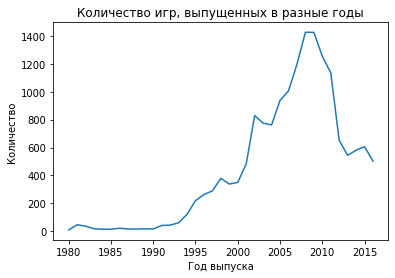

In [60]:
# визуализируем полученные данные
pt_year.plot(kind='line')
plt.title('Количество игр, выпущенных в разные годы')
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.show()

Пик выпуска игр приходится на 2009 год, сильный спад наблюдается в 2013 году. До 2001 года число выпускаемых игр было невелико, с 1983 по 1994 года игры практически не выпускались. 

### Изменение продаж по платформам

In [61]:
# выберим платформы с наибольшими суммарными продажами
platfort_pt = data.pivot_table(index='platform', aggfunc='sum')['full_sales'].sort_values(ascending=False)
platfort_pt

platform
PS2     1255.77
X360     970.17
PS3      939.16
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.44
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: full_sales, dtype: float64

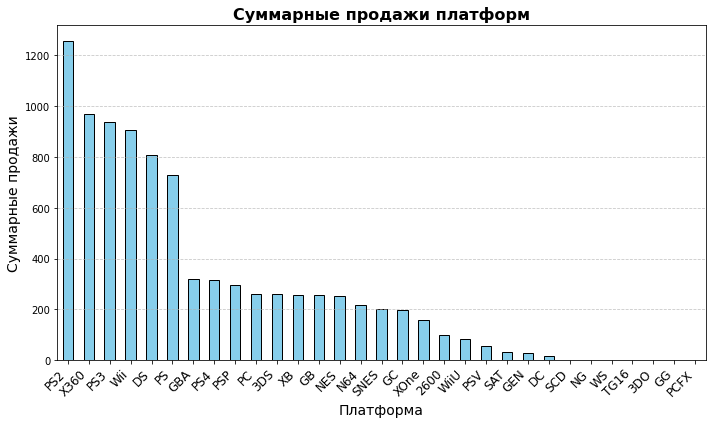

In [62]:
# визуализируем данные
plt.figure(figsize=(10, 6))

platfort_pt.plot.bar(color='skyblue', edgecolor='black')  # Цвет колонок и контуры

# Добавляем заголовки с увеличенным размером шрифта
plt.title('Суммарные продажи платформ', fontsize=16, fontweight='bold')
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Суммарные продажи', fontsize=14)

# Поворот меток оси X для лучшей читаемости
plt.xticks(rotation=45, ha='right', fontsize=12)

# Добавляем сетку
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Сетка только по оси Y

# Показываем график
plt.tight_layout()  # Подгоняем элементы графика
plt.show()

Таким образом, платформы с наибольшими продажами - PS2, X360, PS3, Wii, DS, PS. Построим распределение по годам.

In [63]:
rich_pf = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
data_platforms = data.query('platform in @rich_pf')
data_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01
16699,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,<NA>,NaN,E,0.01
16704,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,<NA>,NaN,undefined,0.00
16705,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01


In [64]:
# создадим функцию для построения графиков
def games_per_year(pf_list, data, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # создаём сетку графиков
    axes = axes.flatten()  # преобразуем матрицу axes в одномерный массив для удобства доступа
    for i, rich_platform in enumerate(pf_list):
        df = data.query('platform == @rich_platform').pivot_table(index='year_of_release', aggfunc='sum')['full_sales']
        df.plot(kind='line', ax=axes[i], style='o-')  # строим график на нужной оси
        axes[i].set_title(f'Игры по годам для платформы {rich_platform}')
        axes[i].set_xlabel('Год выпуска')
        axes[i].set_ylabel('Количество')

    plt.tight_layout()  # для более аккуратного расположения графиков
    plt.show()

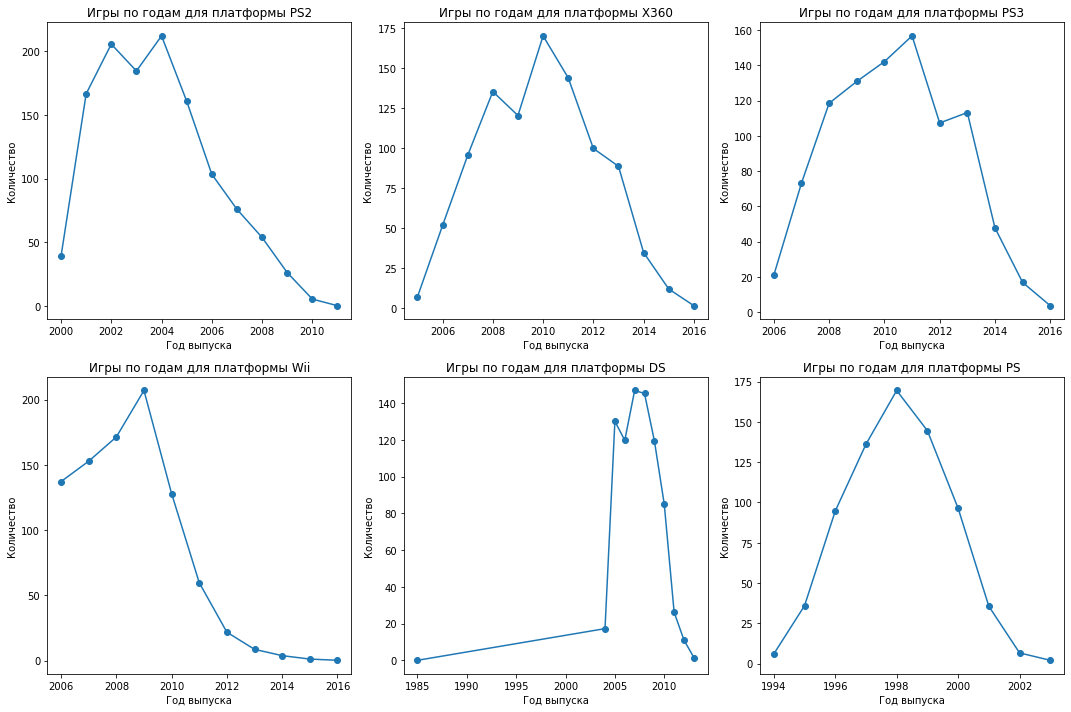

In [65]:
games_per_year(rich_pf, data, rows=2, cols=3)

In [66]:
# напишем функцию для расчёта жизненного цикла приведённых платформ
def life_of_platforms(pf_list):
    life_list = []
    for platform in pf_list:
        life_list.append(data_platforms.query('platform == @platform').pivot_table(index='year_of_release')['full_sales'].count())
    return round(sum(life_list)/len(life_list), 2)      

In [67]:
life_of_platforms(rich_pf)

11.17

Таким образом, жизненный цикл компании составляет 11 лет. Пиковые значения видны примерно в середине срока - в 2015 году наблюдается рост количества игр, тогда возьмём 3 года. Данный срок является актуальным периодом для прогнозов, тогда для предсказаний на 2017 год возьмём данные с 2013 по 2016 года. 

In [68]:
actual_data = data.query('year_of_release >= 2013')
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,undefined,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16698,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01
16702,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01
16705,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01
16707,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01


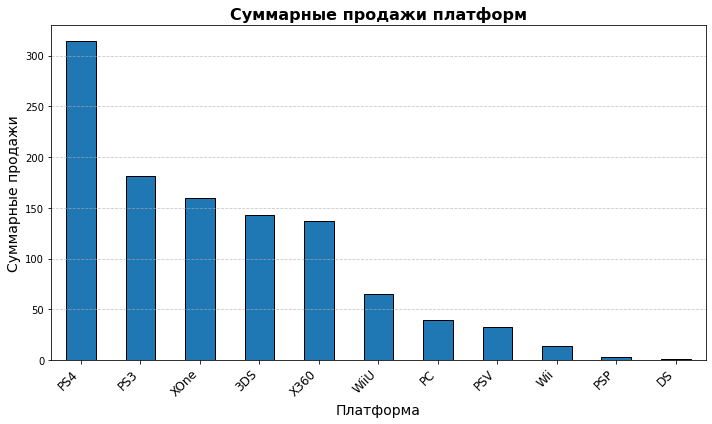

In [69]:
actual_platfort_pt = actual_data.pivot_table(index='platform', aggfunc='sum')['full_sales'].sort_values(ascending=False)

# визуализируем данные по продажам за акутуальный период
plt.figure(figsize=(10, 6))

actual_platfort_pt.plot.bar(edgecolor='black')  # Цвет колонок и контуры

# Добавляем заголовки с увеличенным размером шрифта
plt.title('Суммарные продажи платформ', fontsize=16, fontweight='bold')
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Суммарные продажи', fontsize=14)

# Поворот меток оси X для лучшей читаемости
plt.xticks(rotation=45, ha='right', fontsize=12)

# Добавляем сетку
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Сетка только по оси Y

# Показываем график
plt.tight_layout()  # Подгоняем элементы графика
plt.show()

Таким образом, лидиры по продажам - X360, PS3, XOne, PS4, 3DS. Выведем матрицу графиков динамики продаж по данным платформам.

In [70]:
def score_per_year(pf_list, data, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # создаём сетку графиков
    axes = axes.flatten()  # преобразуем матрицу axes в одномерный массив для удобства доступа
    for i, rich_platform in enumerate(pf_list):
        df = data.query('platform == @rich_platform').pivot_table(index='year_of_release', aggfunc='sum')['full_sales']
        df.plot(kind='line', ax=axes[i], style='o-')  # строим график на нужной оси
        axes[i].set_title(f'Продажи по годам для платформы {rich_platform}')
        axes[i].set_xlabel('Год')
        axes[i].set_ylabel('Суммарные продажи')
        

    plt.tight_layout()  # для более аккуратного расположения графиков
    
    plt.show()

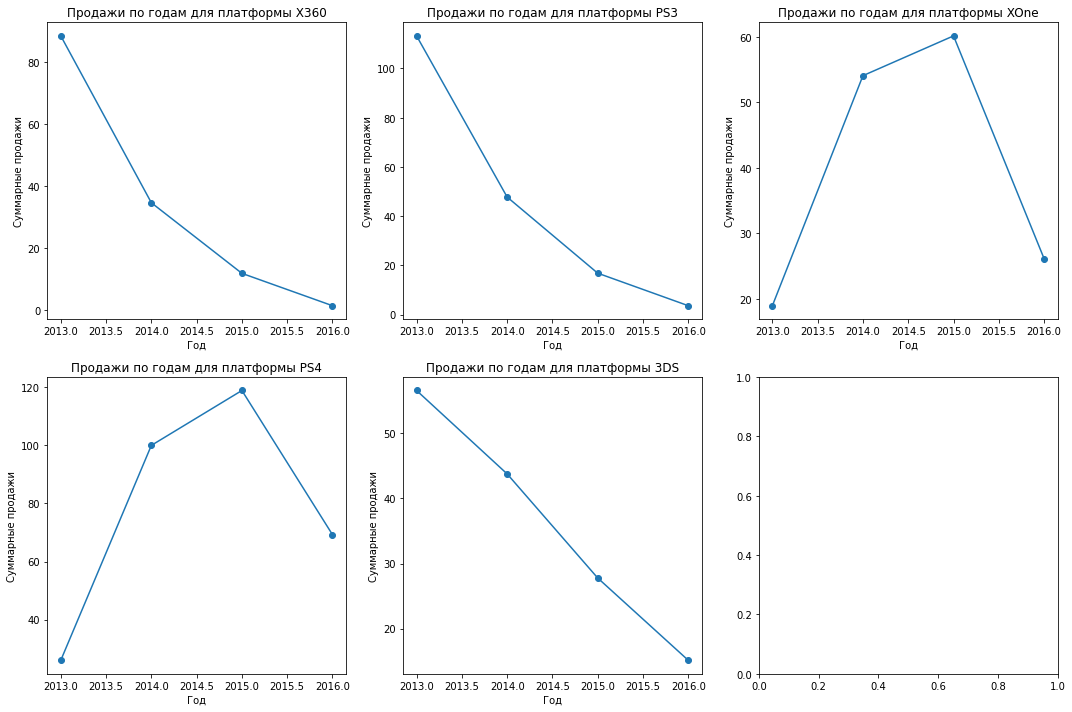

In [71]:
actual_rich_platforms = ['X360', 'PS3', 'XOne', 'PS4', '3DS']
score_per_year(actual_rich_platforms, actual_data, 2, 3)

Итого, из потенциальных платформ потенциал наблюдается у PS4 и XOne - пик продаж приходится на 2015 год, показатели X360, PS3, 3DS резко снижаются с начала периода. 

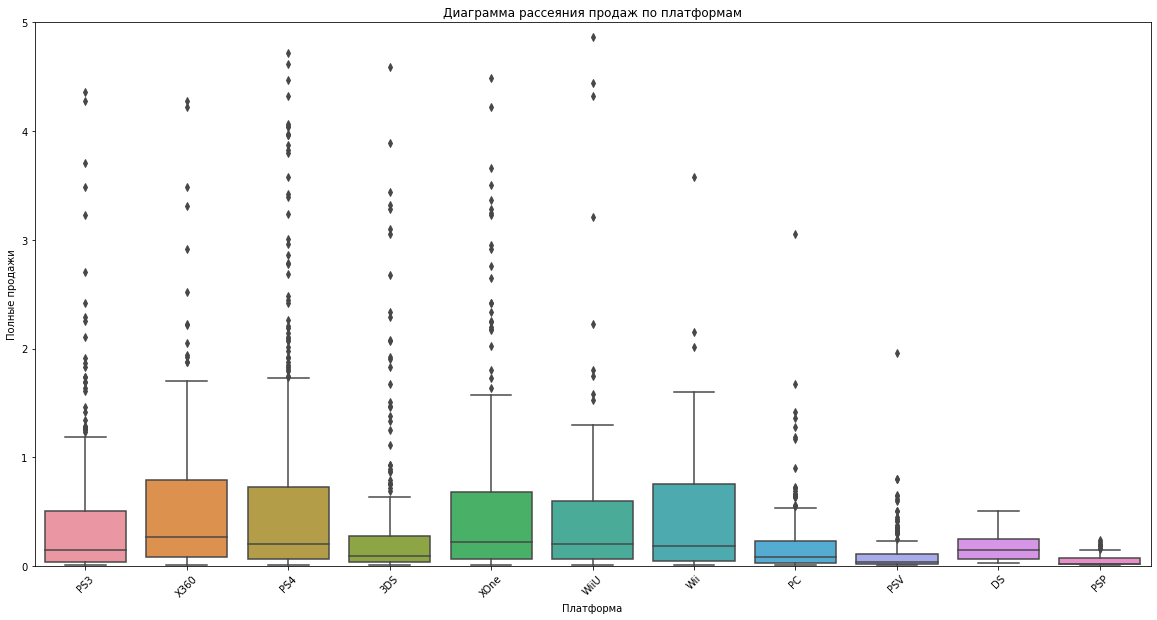

In [72]:
# построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
def box_plot(actual_data):
        
    # Строим боксплот
    plt.figure(figsize=(20, 10))
    sns.boxplot(x='platform', y='full_sales', data=actual_data)
    
    plt.title('Диаграмма рассеяния продаж по платформам')
    
    plt.xticks(rotation=45)  # Поворот меток по оси X для лучшей читаемости
    plt.ylim(0, 5)
    plt.xlabel('Платформа')
    plt.ylabel('Полные продажи')
    plt.show()


box_plot(actual_data)

Согласно ящику с усами, медианные значения продаж наивысшие у XOne, PS4 и X360. Среди лидеров продаж у каждой из платформ наблюдаются экстремальные значения, при этом межквартильный размах варьируется от 0,5 млн копий у 3DS (у которой наибольшее число выбросов, из-за чего, вероятно, она входит в топ) до примерно 1,75 у X360 и PS4. Выбросы - экстремально высокие значения, то есть завышенные в сравнении с общим распределением продаж на определённой платформе. Малое кол-во выбросов и больший межквартильный размах (усы) свидетельствует о нормальности данных и стабильности. У лидеров суммарных продаж наравне с платформами WiiU и Wii наблюдаются наивысшие медианные значения.

###  Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы 

In [73]:
actual_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,full_sales
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,991.000000,1192.000000,2233.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,72.023209,6.584564,0.488442
std,1.089439,0.547730,0.512451,0.233997,0.165693,12.841318,1.610413,1.235226
min,2013.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,74.000000,7.000000,0.110000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,81.000000,7.800000,0.400000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


In [74]:
# так как медианное значение и межквартильный размах у X360 и PS4 примерно одинаковые,
# возьмём в рассмотрение PS 4, так как продажи данной платформы пошли на спад лишь с 2015 года
# в то время как у X360 продажи снижаются с начала рассматриваемого периода
ps4 = actual_data.query('platform == "PS4" and user_score > 0')
ps4.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,full_sales
count,257.000000,257.000000,257.000000,257.000000,257.000000,249.000000,257.000000,257.000000
mean,2015.073930,0.329416,0.438833,0.036770,0.147977,72.132530,6.748249,0.952996
std,0.909145,0.560501,0.874500,0.067454,0.254279,12.550965,1.459481,1.627896
min,2013.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.500000,0.010000
25%,2014.000000,0.020000,0.020000,0.000000,0.010000,66.000000,6.100000,0.070000
50%,2015.000000,0.090000,0.110000,0.010000,0.040000,74.000000,7.000000,0.260000
75%,2016.000000,0.370000,0.420000,0.050000,0.160000,80.000000,7.800000,1.050000
max,2016.000000,3.960000,6.310000,0.490000,1.970000,97.000000,9.200000,12.620000


In [75]:
# рассчитаем коэффициент корреляции между продажами и отзывами критиков и пользователей
print(f'Корреляция между продажами и оценками критиков {round(ps4["critic_score"].astype(float).corr(ps4["full_sales"]), 2)}')
print(f'Корреляция между продажами и оценками пользователей {round(ps4["user_score"].astype(float).corr(ps4["full_sales"]), 2)}')

Корреляция между продажами и оценками критиков 0.41
Корреляция между продажами и оценками пользователей -0.03


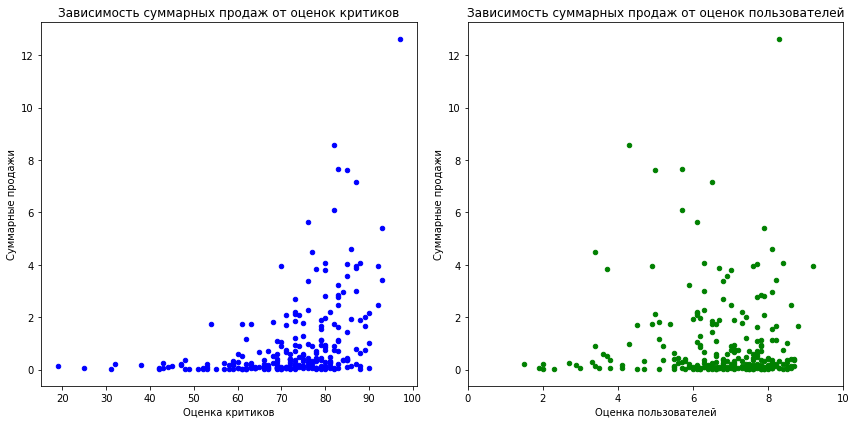

In [76]:
# визуализируем показатели на диаграммах рассеяния

# Создаем область для двух графиков
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 строка, 2 столбца, общая ширина 12, высота 6

# Первый график - зависимости от оценок критиков
ps4.plot.scatter(x='critic_score', y='full_sales', ax=axes[0], color='blue')
axes[0].set_title('Зависимость суммарных продаж от оценок критиков')
axes[0].set_xlabel('Оценка критиков')
axes[0].set_ylabel('Суммарные продажи')

# Второй график - зависимости от оценок пользователей
ps4.plot.scatter(x='user_score', y='full_sales', ax=axes[1], color='green')
axes[1].set_title('Зависимость суммарных продаж от оценок пользователей')
axes[1].set_xlabel('Оценка пользователей')
axes[1].set_ylabel('Суммарные продажи')
axes[1].set_xlim(0, 10)  # Ограничение по оси X от 0 до 10

# Добавляем отступы между графиками для лучшей читабельности
plt.tight_layout()
plt.show()

Таким образом, корреляция между продажами и оценками пользователей близится к нулю, что соответствует отсутствию зависимости, что подтверждает диаграмма рассеяния. Коэффициент корреляции между оценками критиков и продажами положительный и равен 0,34, что свидетельствует о наличие прямой зависимости.

In [77]:
# соотнесём выводы с продажами игр на других платформах, создадим функцию для постороения графиков 
def sales_corr(pf_list):
    for rich_platform in pf_list:
        actual_pf = actual_data.query('platform == @rich_platform and user_score > 0')
        print(f'Корреляция между продажами и оценками критиков на платформе {rich_platform}: {round(actual_pf["critic_score"].astype(float).corr(actual_pf["full_sales"]), 2)}')
        print(f'Корреляция между продажами и оценками пользователей на платформе {rich_platform}: {round(actual_pf["user_score"].astype(float).corr(actual_pf["full_sales"]), 2)}')
        print()
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 строка, 2 столбца, общая ширина 12, высота 6

        # Первый график - зависимости от оценок критиков
        actual_pf.plot.scatter(x='critic_score', y='full_sales', ax=axes[0], color='blue')
        axes[0].set_title('Зависимость суммарных продаж от оценок критиков')
        axes[0].set_xlabel('Оценка критиков')
        axes[0].set_ylabel('Суммарные продажи')

        # Второй график - зависимости от оценок пользователей
        actual_pf.plot.scatter(x='user_score', y='full_sales', ax=axes[1], color='green')
        axes[1].set_title('Зависимость суммарных продаж от оценок пользователей')
        axes[1].set_xlabel('Оценка пользователей')
        axes[1].set_ylabel('Суммарные продажи')
        axes[1].set_xlim(0, 10)  # Ограничение по оси X от 0 до 10

        # Добавляем отступы между графиками для лучшей читабельности
        plt.tight_layout()
        plt.show()
        print()

Корреляция между продажами и оценками критиков на платформе X360: 0.35
Корреляция между продажами и оценками пользователей на платформе X360: -0.01



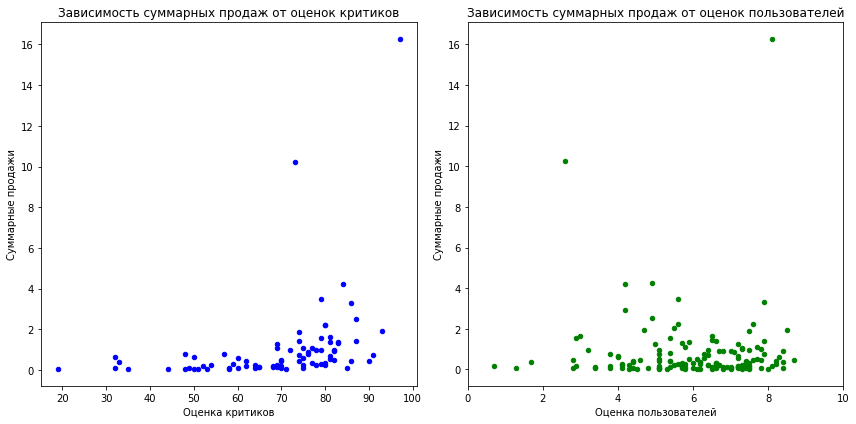


Корреляция между продажами и оценками критиков на платформе PS3: 0.33
Корреляция между продажами и оценками пользователей на платформе PS3: 0.0



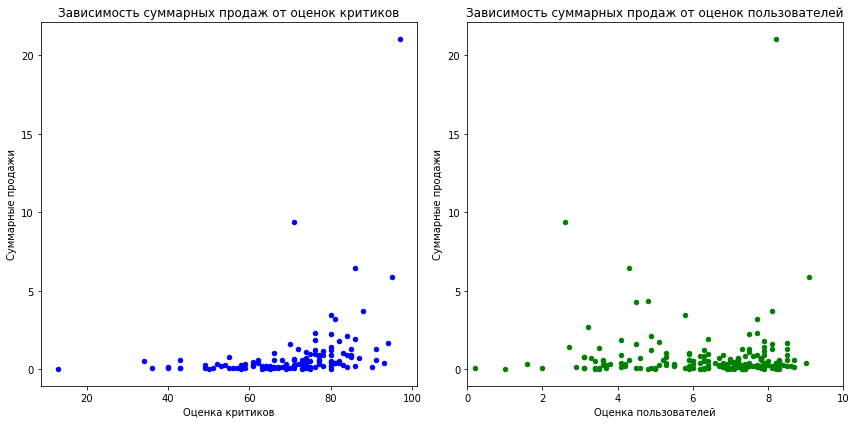


Корреляция между продажами и оценками критиков на платформе XOne: 0.41
Корреляция между продажами и оценками пользователей на платформе XOne: -0.07



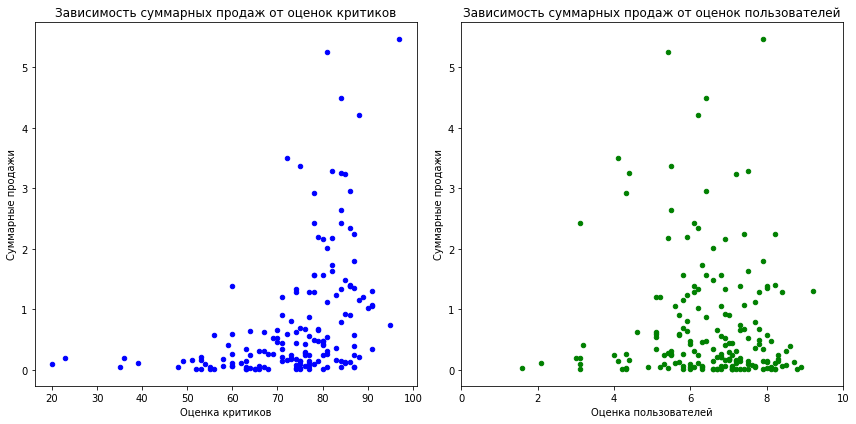


Корреляция между продажами и оценками критиков на платформе PS4: 0.41
Корреляция между продажами и оценками пользователей на платформе PS4: -0.03



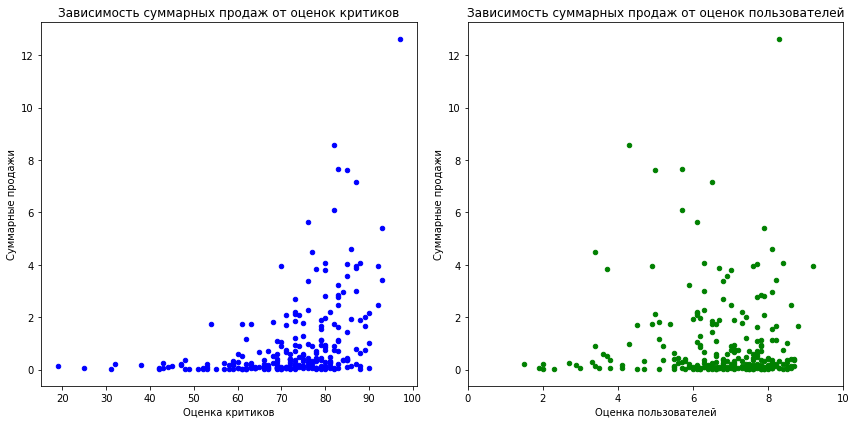


Корреляция между продажами и оценками критиков на платформе 3DS: 0.34
Корреляция между продажами и оценками пользователей на платформе 3DS: 0.24



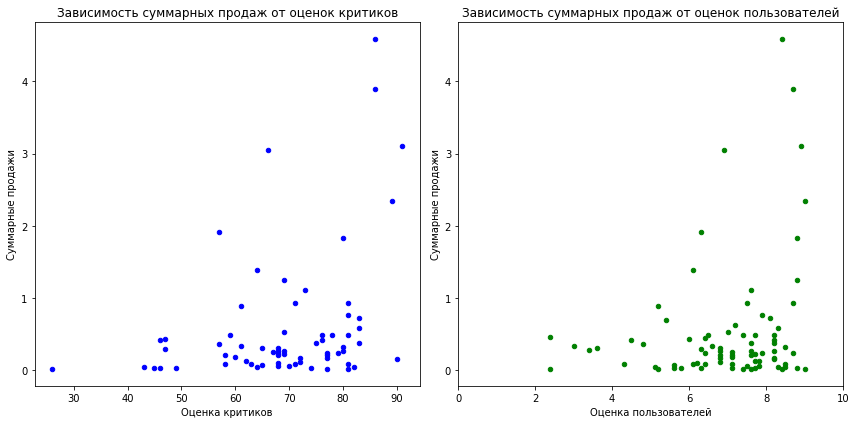

In [78]:
sales_corr(actual_rich_platforms)

Результаты по остальным популярным платформам показали схожие результаты, можно сделать вывод, что таковым является тренд и вывод одинаков по всем данным.

### Общее распределение игр по жанрам

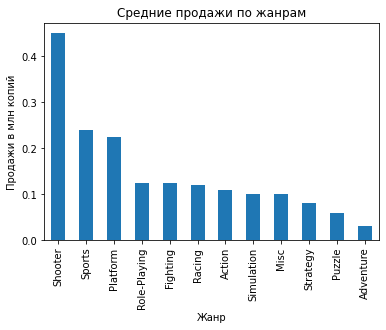

In [79]:
actual_data.pivot_table(index='genre', aggfunc='median')['full_sales'].sort_values(ascending=False).plot.bar()
plt.title('Средние продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи в млн копий')
plt.show()

Таким образом, распределение продаж по жанрам показало, что наиболее прибыльные шутеры - их продажи превышают показатели других жанров более чем в 2 раза. Наименее прибыльные - пазлы, стратегии и приключения, их продажи более чем в 2 раза ниже остальных жанров.

Выводы:
- Пик выпуска игр приходится на 2009 год, сильный спад наблюдается в 2013 году, до 2001 года число выпускаемых игр было невелико, с 1983 по 1994 года игры практически не выпускались
- Платформы с наибольшими продажами - PS2, X360, PS3, Wii, DS, PS, при этом данные приставки показывают отсутствие или снижение продаж к 2016 году 
- На основе проанализированных данных был выявлен жизненный цикл компании - 11 лет, пиковые значения продаж наблюдаются примерно в середине срока - в 2015 году наблюдается рост количества игр, таким образом, рассматриваем половину цикла - 3 года; данный срок является актуальным периодом для прогнозов - для предсказаний на 2017 год берём данные с 2013 по 2016 года
- Исходя из актуальных данных, платформы с наибольшими продажами - X360, PS3, 3DS, PS4 и XOne; потенциал наблюдается у PS4 и XOne - Пик продаж приходится на 2015 год, показатели X360, PS3, 3DS резко снижаются с начала периода
- Согласно диаграмме размаха, медианные значения продаж наивысшие у PS3, PS4 и X360; у всех платформ наблюдаются экстремальные значения, при этом межквартильный размах варьируется от 0,5 млн копий у 3DS до примерно 1,75 у X360 и PS4
- Корреляция между продажами и оценками пользователей близится к нулю, что соответствует отсутствию зависимости; коэффициент корреляции между оценками критиков и продажами положительный и равен 0,34, что свидетельствует о наличие прямой зависимости

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

In [80]:
# построим сводную таблицу и с помощью цвета выделим наибольшие продажи по регионам
(actual_data.pivot_table(index=['platform'], values=['na_sales', 'eu_sales', 'jp_sales'])
 .T
 .style
 .format("{:.3f}")
 .background_gradient(cmap='Blues', axis=1)
)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
eu_sales,0.102,0.106,0.134,0.197,0.360,0.003,0.017,0.258,0.173,0.229,0.209
jp_sales,0.224,0.000,0.000,0.068,0.041,0.049,0.052,0.002,0.095,0.003,0.001
na_sales,0.126,0.071,0.059,0.184,0.277,0.000,0.014,0.285,0.254,0.439,0.377


In [81]:
# составим сводную таблицу по заданному параметру, отсортируем и выведем топ-5, визуализируем данные с помощью столбчатой диаграммы
def regions_f(region_list, rows, cols, arg, arg_name):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))  # создаём сетку графиков
    axes = axes.flatten()  # преобразуем матрицу axes в одномерный массив для удобства доступа
    for i, reg in enumerate(region_list):
        reg_data = actual_data.pivot_table(index=[arg], values=reg).sort_values(by=reg, ascending=False).head(5)
        
        reg_data.plot(kind='bar', ax=axes[i])
        if reg == 'na_sales':
            axes[i].set_title(f'Самые популярные {arg_name} в Северной Америке')
        elif reg == 'eu_sales':
            axes[i].set_title(f'Самые популярные {arg_name} в Европе')
        else:
            axes[i].set_title(f'Самые популярные {arg_name} в Японии')
        axes[i].set_xlabel(arg_name)
        axes[i].set_ylabel('Продажи')
        
    
    plt.tight_layout()
    plt.show()

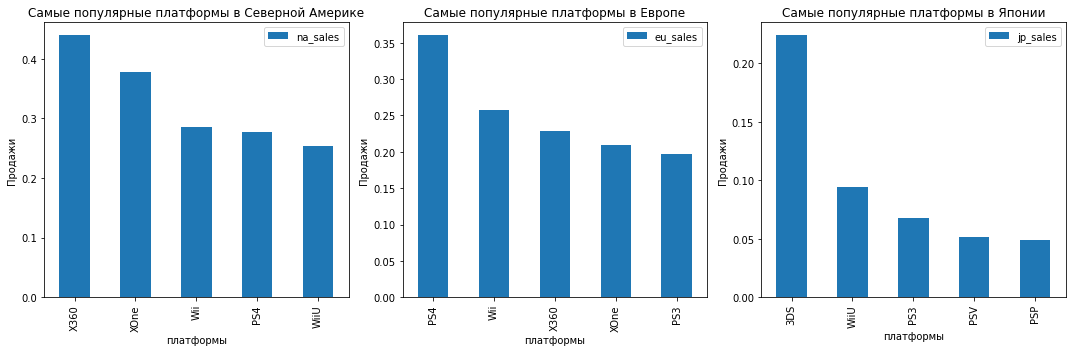

In [82]:
regions_sales = ['na_sales', 'eu_sales', 'jp_sales']
regions_f(regions_sales, 1, 3, 'platform', 'платформы')

- Наиболее популярные платформы в Северной Америке - X360 и XOne (продажи около 0,4 млн), показатели PS4, WiiU и Wii примерно на одном уровне - примерно в 1,5 раза меньше лидеров по продажам.
- В Европе выделяется лидер по продажам - PS4, показатели X360, PS3, WiiU и Wii ниже и примерно равны
- В Японии продажи 3DS в два раза превышают показатели остальных популярных платформ (WiiU, PSP, PS3, PSV)
- Продажи в Америке показывают наибольшие показатели, что объяснимо менталитетом и распространённостью приставок в данном регионе. При этом в Японии продажи почти в два раза ниже, выделяется только один лидер продаж - 3DS, который не входи в топ, а значит не распространён в других регионах. Вероятно популярность приставок в Японии не столь велика, как в Америке и Европе. Разницу в продажах можно также объяснить сравнительно небольшой численностью начеления.

### Самые популярные жанры (топ-5)

In [83]:
# построим сводную таблицу по жанрам и с помощью цвета выделим наибольшие продажи по регионам
(actual_data.pivot_table(index=['genre'], values=['na_sales', 'eu_sales', 'jp_sales'])
 .T
 .style
 .format("{:.3f}")
 .background_gradient(cmap='Blues', axis=1)
)

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
eu_sales,0.154,0.034,0.107,0.129,0.211,0.059,0.238,0.127,0.470,0.176,0.283,0.075
jp_sales,0.053,0.024,0.096,0.059,0.065,0.069,0.027,0.175,0.035,0.073,0.025,0.032
na_sales,0.165,0.029,0.194,0.177,0.245,0.049,0.152,0.159,0.587,0.078,0.305,0.059


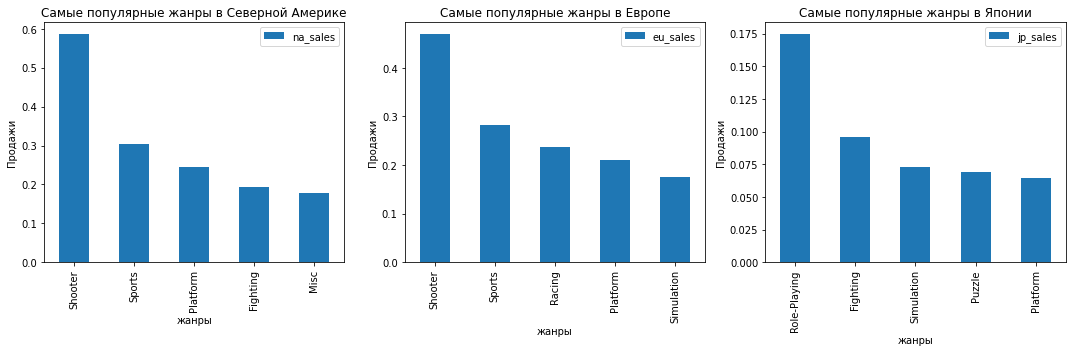

In [84]:
regions_f(regions_sales, 1, 3, 'genre', 'жанры')

- В Европе и Сеерной Америке наиболее популярные жанры - шутеры, платформеры и спортивные игры, при этом шутеры значительно лидируют в продажах.
- В Европе в топ-5 входят гонки и action, в то время как в Америке файтинги и misc
- В Японии наиболее популярный жанр - ролевые игры, также в топ 5 входят симуляции, файтинги и action

### Влияние ли рейтинга ESRB на продажи

Для дальнейшего анализа изучим термины ESRB

- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.

- «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.

- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.

- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, кровь или нечастое использование ненормативной лексики.

- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие

- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип часто используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

In [85]:
# построим сводную таблицу по рейтингу и с помощью цвета выделим наибольшие продажи по регионам
(actual_data.pivot_table(index=['rating'], values=['na_sales', 'eu_sales', 'jp_sales'])
 .T
 .style
 .format("{:.3f}")
 .background_gradient(cmap='Blues', axis=1)
)

rating,E,E10+,M,T,undefined
eu_sales,0.276,0.169,0.394,0.126,0.081
jp_sales,0.050,0.023,0.038,0.062,0.087
na_sales,0.262,0.215,0.448,0.150,0.092


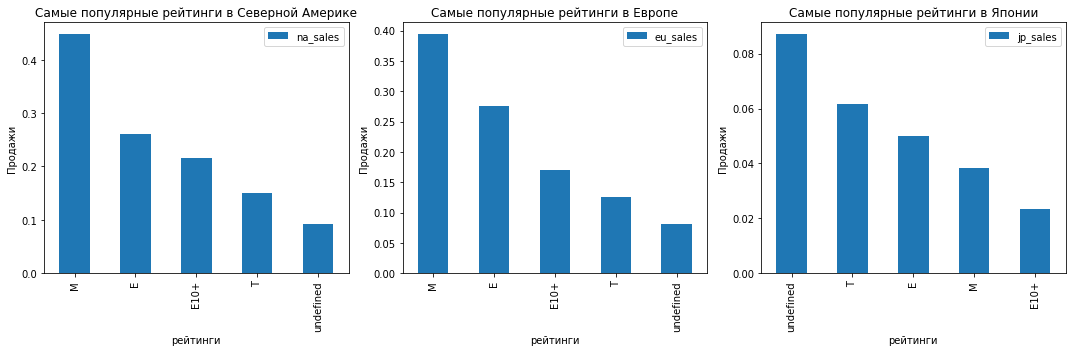

In [86]:
regions_f(regions_sales, 1, 3, 'rating', 'рейтинги')

- В Северной Америке наибольшими продажами обладают игры с рейтингом М (для взрослых)

- В Европе лидером по продажам являются игры для лиц старше 17 лет, показатель превышает продажи остальных рейтингов. С небольшим отрывом выделяются также игры для всех

- В Японии наибольшие продажи соответствуют играм с неопределённым рейтингом, также популярны игры для подростков (12+) и всех возрастов (6+)

Таким образом, рейтинг игр ESRB влияет на их продаваемость, во всех регионах востребованы игры всех возрастов. В Европе и Америке наибольшей популярностью обладают игры с рейтингом 18+, что объясняется высокими показателями продаж шутеров.

## Проверка гипотез

### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверяется гипотеза о равенстве средних двух генеральных совокупностей, альтернативная гипотеза двухсторонняя, так как предпологается неравенство. Используем двухвыборочный t-тест для независимых выборок.

Н0: средние пользовательские рейтинги платформ Xbox One и PC равны

Н1: средние пользовательские рейтинги платформ Xbox One и PC не равны

In [87]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу
xbox = actual_data.query('platform == "XOne"')
pc = actual_data.query('platform == "PC"')
# удалим пропуски для корректного статистического анализа
xbox = xbox.dropna()
pc = pc.dropna()

results = st.ttest_ind(xbox['user_score'], pc['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC не равны')
else:
    print('Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC равны') 

p-значение: 0.17882648263401307
Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC равны


Таким образом, на 5% уровне значимости не отвергаем гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC

### Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные

Проверяется гипотеза о равенстве средних двух генеральных совокупностей, альтернативная гипотеза двухсторонняя, так как предпологается неравенство. Используем двухвыборочный t-тест для независимых выборок.

Н0: средние пользовательские рейтинги жанров Action и Sports равны

Н1: средние пользовательские рейтинги жанров Action и Sports разные

In [88]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу
action = actual_data.query('genre == "Action"')
sports = actual_data.query('genre == "Sports"')
# удалим пропуски для корректного статистического анализа
action = action.dropna()
sports = sports.dropna()

results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports разные')
else:
    print('Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports равны') 

p-значение: 1.0496920005008588e-13
Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports разные


Таким образом, на 5% уровне значимости отвергаем гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports, то есть есть основание считать, что показатели разные.

## Общий вывод

В ходе исследования была проведена следующая работа с данными:
- Обработаны названия столбцов и приведены к змеиному регистру
- Проведена работа с аномалиями и типами данных:
    - год релиза игр и оценки критиков приведены к целочисленному типу
    - в оценке пользователей выявлено значение tbd, которое, вероятно, свидетельствует о дополнении данных; аномалия заменена на пропуск, тип данных преобразован в float
    - выявлена значимая доля выбросов 10-12% в продажах, выбросы не удалены для корректной работы с данными о продажах 
- Проведена работа с пропусками:
    - пропуски в названии игр и жанрах заменены на unknown, данные значения выявлены на платформе GEN, дальнейший анализ показал, что на данной платформе отсутствуют значения рейтинга, оценок критиков и пользователей, следовательно, в открытых источниках недостаточно данных; рекомендация - поиск информации по платформе
    - в столбцах рейтинга, оценок критиков и пользователей выявлена значимая доля пропусков - более 35%; пропуски в рейтинге заменены на "Undenied", в оценках пропуски также оставили для исключения искажений
- Для анализа ключевого фактора добавлен столбец с суммарными продажами

Исследовательский анализ данных привёл к следующим результатам и выводам:
- Пик выпуска игр приходится на 2009 год, сильный спад наблюдается в 2013 году, до 2001 года число выпускаемых игр было невелико, с 1983 по 1994 года игры практически не выпускались
- Платформы с наибольшими продажами - PS2, X360, PS3, Wii, DS, PS, при этом данные приставки показывают отсутствие или снижение продаж к 2016 году 
- На основе проанализированных данных был выявлен жизненный цикл компании - 11 лет, пиковые значения продаж наблюдаются примерно в середине срока - в 2015 году наблюдается рост количества игр, таким образом, рассматриваем половину цикла - 3 года; данный срок является актуальным периодом для прогнозов - для предсказаний на 2017 год берём данные с 2013 по 2016 года
- Исходя из актуальных данных, платформы с наибольшими продажами - X360, PS3, 3DS, PS4 и XOne; потенциал наблюдается у PS4 и XOne - Пик продаж приходится на 2015 год, показатели X360, PS3, 3DS резко снижаются с начала периода
- Согласно диаграмме размаха, медианные значения продаж наивысшие у PS3, PS4 и X360; у всех платформ наблюдаются экстремальные значения, при этом межквартильный размах варьируется от 0,5 млн копий у 3DS до примерно 1,75 у X360 и PS4, что говорит о преобладании нормальных значений
- Корреляция между продажами и оценками пользователей близится к нулю, что соответствует отсутствию зависимости; коэффициент корреляции между оценками критиков и продажами положительный и равен 0,34, что свидетельствует о наличие прямой зависимости

Выводы по портрету пользователя по регионам:
- Наиболее прибыльный жанр игр - шутеры - их продажи превышают показатели других жанров более чем в 1,5 раза; Наименее прибыльные - пазлы, стратегии и приключения
- Наиболее популярные платформы в Северной Америке - X360 и XOne; в Европе выделяется лидер по продажам - PS4; В Японии продажи 3DS в два раза превышают показатели остальных популярных платформ (WiiU, PSP, PS3, PSV)
- Продажи в Америке показывают наибольшие показатели, в Японии продажи почти в два раза ниже, выделяется только один лидер продаж - 3DS; Вероятно популярность приставок в Японии не столь велика, как в Америке и Европе, разницу в продажах можно также объяснить сравнительно небольшой численностью населения
- В Европе и Северной Америке наиболее популярные жанры - шутеры, платформеры и спортивные игры, в Европе в топ-5 входят гонки и action, в то время как в Америке файтинги и misc, в Японии наиболее популярный жанр - ролевые игры, также в топ 5 входят платформеры, симуляции, файтинги и action
- Рейтинг игр ESRB влияет на их продаваемость, во всех регионах востребованы игры всех возрастов. В Европе и Америке наибольшей популярностью обладают игры с рейтингом 18+, что объясняется высокими показателями продаж шутеров

Выводы по статистическому анализу данных:
- На 5% уровне значимости не отвергаем гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC
- На 5% уровне значимости отвергаем гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports, то есть есть основание считать, что показатели разные

**Рекомендации**: исходя из жизненного цикла компаний и статистике по росту и спау в продажах за последние годы, для составления прогноза на 2017 год стоит рассматривать период с 2011 года. Наиболее потенциальные для продвижения платформы - PS4 и X360, для работы с рынком продаж в Японии следует выбрать 3DS. Наиболее популярный жанр игр в Северной Америке и Европе - шутеры, при этом для выхода на все рынки предпочтительнее платформеры, так как они входят в ТОП-5 во всех регионах. При выборе жанра также следует учитывать рейтинг ESRB - во всех регионах игры для всех возрастов показывают высокие продажи, в Европе и Северной Америке также следует продвигать игры "для взрослых". На продажи игр влияет оценка критиков - стоит прослеживать тенденцию. 